In [295]:
# Import necessary modules 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, precision_score
from sklearn.preprocessing import MinMaxScaler

In [296]:
irisData = load_iris()

In [297]:
# Create feature and target arrays 
X = irisData.data 
y = irisData.target

In [298]:
X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.5, random_state=42)

In [299]:
#scaling the data
scaler = MinMaxScaler()
#scaling the training dataset
X_train_scaled = scaler.fit_transform(X_train)
#scaling the test dataset using the parameters generated from the scaling in the training dataset
X_test_scaled = scaler.transform(X_test)

In [300]:
neighbors = np.arange(1, 21) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors))

In [301]:
# Loop over K values 
for i,k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train_scaled, y_train)
    # Compute training and test data accuracy 
    train_accuracy[i] = knn.score(X_train_scaled, y_train)
    test_accuracy[i] = knn.score(X_test_scaled, y_test)

In [302]:
test_accuracy

array([0.98666667, 0.90666667, 0.98666667, 0.94666667, 0.96      ,
       0.96      , 0.97333333, 0.97333333, 0.98666667, 0.96      ,
       0.97333333, 0.96      , 0.97333333, 0.96      , 0.96      ,
       0.94666667, 0.94666667, 0.94666667, 0.94666667, 0.90666667])

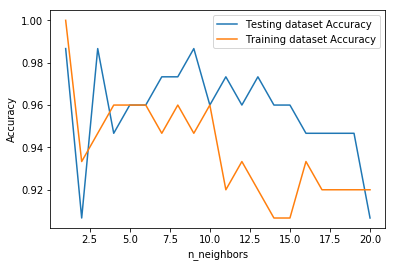

In [303]:
# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 